In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
#libraries for LR
from sklearn.linear_model import LogisticRegression
#libraries for NB
from sklearn.naive_bayes import GaussianNB
#librares for SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#load dataset into pandas
HFP_dataset = pd.read_csv('heart.csv')
HFP_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Check for missing values
missing_values = HFP_dataset[pd.isnull(HFP_dataset).any(axis=1)]
missing_values.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
# Explore data types
print(HFP_dataset.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [ ]:
# Convert categorical variables to numerical
# Sex: 'M' to 0, 'F' to 1
HFP_dataset['Sex'] = HFP_dataset['Sex'].map({'M': 0, 'F': 1})
# ExerciseAngina: 'N' to 1, 'Y' to 0
HFP_dataset['ExerciseAngina'] = HFP_dataset['ExerciseAngina'].map({'N': 1, 'Y': 0})

# One-hot encoding categorical variables
chest_pain_dummies = pd.get_dummies(HFP_dataset['ChestPainType'],prefix='ChestPainType')
HFP_dataset = pd.concat([HFP_dataset, chest_pain_dummies], axis=1)
HFP_dataset.drop(columns=['ChestPainType'], inplace=True)

ecg_dummies = pd.get_dummies(HFP_dataset['RestingECG'], prefix='RestingECG')
HFP_dataset = pd.concat([HFP_dataset, ecg_dummies], axis=1)
HFP_dataset.drop(columns=['RestingECG'], inplace=True)

st_slope_dummies = pd.get_dummies(HFP_dataset['ST_Slope'], prefix='ST_Slope')
HFP_dataset = pd.concat([HFP_dataset, st_slope_dummies], axis=1)
HFP_dataset.drop(columns=['ST_Slope'], inplace=True)

# Converting all Boolean columns in the DataFrame to integers (0 and 1)
HFP_dataset = HFP_dataset.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Display the updated dataset
print(HFP_dataset.head())


   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    0        140          289          0    172               1   
1   49    1        160          180          0    156               1   
2   37    0        130          283          0     98               1   
3   48    1        138          214          0    108               0   
4   54    0        150          195          0    122               1   

   Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0      0.0             0                  0                  1   
1      1.0             1                  0                  0   
2      0.0             0                  0                  1   
3      1.5             1                  1                  0   
4      0.0             0                  0                  0   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0                  0                 0               0                  1   
1         

<ipython-input-5-f2f758e4f209>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  HFP_dataset = HFP_dataset.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [ ]:
# standardize numerical features since best for models LR
scaler = StandardScaler()
HFP_dataset[['RestingBP', 'Cholesterol', 'MaxHR']] = scaler.fit_transform(HFP_dataset[['RestingBP', 'Cholesterol', 'MaxHR']])

In [ ]:
# defining features (SelectedFeatures) and target (TargetFeature)
TargetFeature = HFP_dataset['HeartDisease'].copy()
SelectedFeatures = HFP_dataset.drop(columns=['HeartDisease'])
print(SelectedFeatures.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0   40    0   0.410909     0.825070          0  1.382928               1   
1   49    1   1.491752    -0.171961          0  0.754157               1   
2   37    0  -0.129513     0.770188          0 -1.525138               1   
3   48    1   0.302825     0.139040          0 -1.132156               0   
4   54    0   0.951331    -0.034755          0 -0.581981               1   

   Oldpeak  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0                  0                  1                  0   
1      1.0                  0                  0                  1   
2      0.0                  0                  1                  0   
3      1.5                  1                  0                  0   
4      0.0                  0                  0                  1   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                 0               0        

In [ ]:
print(TargetFeature.head())

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64


In [ ]:
# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(SelectedFeatures, TargetFeature, test_size=0.25, random_state=42)


Cross-Validation Scores: [0.87391304 0.88695652 0.86026201 0.76419214]
Accuracy: 0.8652173913043478
Precision: 0.904
Recall: 0.8560606060606061


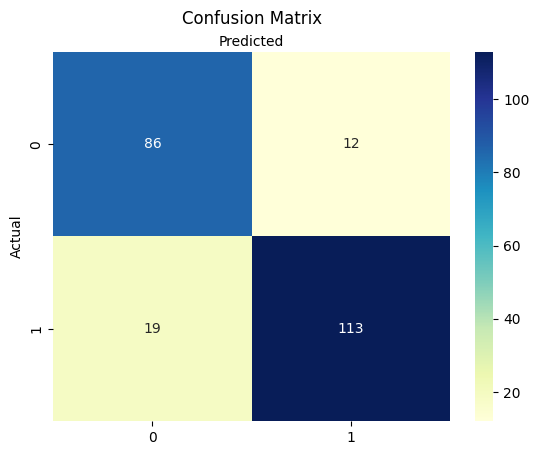

From the matrix:
The model correctly classified a total of 86 (True Negatives) + 113 (True Positives) = 199 instances.
It misclassified a total of 12 (False Positives) + 19 (False Negatives) = 31 instances.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
#libraries for LR
from sklearn.linear_model import LogisticRegression

#logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Performing cross-validation with K=4
cv_scores = cross_val_score(lr_model, SelectedFeatures, TargetFeature, cv=4)
print("Cross-Validation Scores:", cv_scores)

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

#calculating accuracy, precision, and recall
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy}")
lr_precision = precision_score(y_test, y_pred)
print(f"Precision: {lr_precision}")
lr_recall = recall_score(y_test, y_pred)
print(f"Recall: {lr_recall}")

#confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_pred)

# Defining labels and plotting heatmap
labels = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Plotting heatmap
snsplot = sns.heatmap(pd.DataFrame(lr_conf_matrix), annot=True, cmap="YlGnBu", fmt='g', cbar=True, ax=ax)
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', pad=20)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
tn, fp, fn, tp = lr_conf_matrix.ravel()
total_correct = tn + tp
total_misclassified = fp + fn
print(f"From the matrix:")
print(f"The model correctly classified a total of {tn} (True Negatives) + {tp} (True Positives) = {total_correct} instances.")
print(f"It misclassified a total of {fp} (False Positives) + {fn} (False Negatives) = {total_misclassified} instances.")

Cross-Validation Scores: [0.86086957 0.9        0.84716157 0.75545852]
Accuracy: 0.8608695652173913
Precision: 0.8968253968253969
Recall: 0.8560606060606061


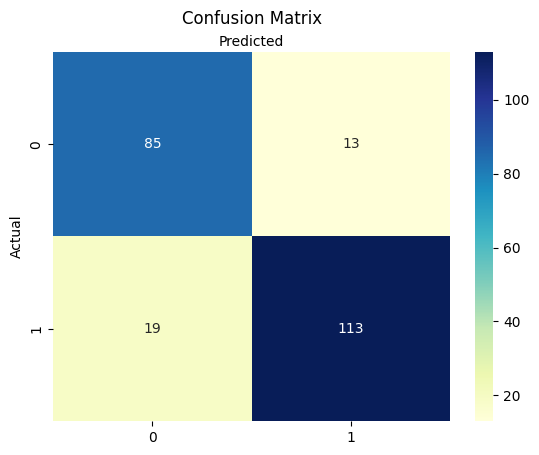

From the matrix:
The model correctly classified a total of 85 (True Negatives) + 113 (True Positives) = 198 instances.
It misclassified a total of 13 (False Positives) + 19 (False Negatives) = 32 instances.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
#libraries for NB
from sklearn.naive_bayes import GaussianNB


#NAIVE BAYES
nb_model = GaussianNB()

# Performing cross-validation with K=4
cv_scores = cross_val_score(nb_model, SelectedFeatures, TargetFeature, cv=4)
print("Cross-Validation Scores:", cv_scores)

nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

#calculating accuracy, precision, and recall
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")

#confusion matrix
nb_conf_matrix = confusion_matrix(y_test, y_pred)

# Defining labels and plotting heatmap
labels = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Plotting heatmap
sns.heatmap(pd.DataFrame(nb_conf_matrix), annot=True, cmap="YlGnBu", fmt='g', cbar=True, ax=ax)
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', pad=20)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
tn, fp, fn, tp = nb_conf_matrix.ravel()
total_correct = tn + tp
total_misclassified = fp + fn
print(f"From the matrix:")
print(f"The model correctly classified a total of {tn} (True Negatives) + {tp} (True Positives) = {total_correct} instances.")
print(f"It misclassified a total of {fp} (False Positives) + {fn} (False Negatives) = {total_misclassified} instances.")

Cross-Validation Scores: [0.8826087  0.88695652 0.86026201 0.73799127]
Kernel: linear
Accuracy: 0.8608695652173913
Precision: 0.9032258064516129
Recall: 0.8484848484848485


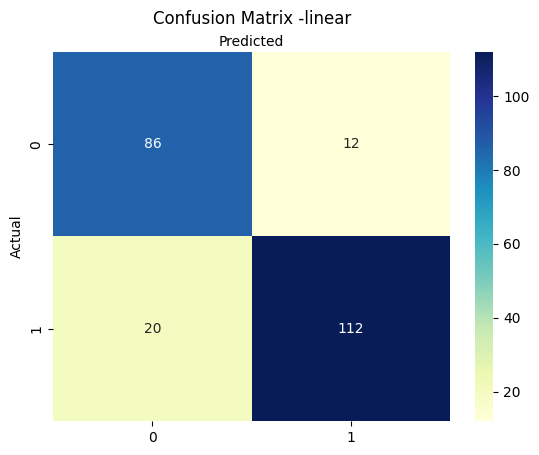

From the matrix:
The model correctly classified a total of 86 (True Negatives) + 112 (True Positives) = 198 instances.
It misclassified a total of 12 (False Positives) + 20 (False Negatives) = 32 instances.
Cross-Validation Scores: [0.70434783 0.79565217 0.79912664 0.72925764]
Kernel: poly
Accuracy: 0.7434782608695653
Precision: 0.8288288288288288
Recall: 0.696969696969697


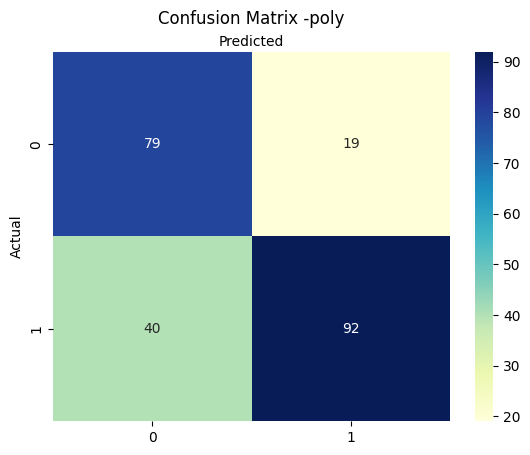

From the matrix:
The model correctly classified a total of 79 (True Negatives) + 92 (True Positives) = 171 instances.
It misclassified a total of 19 (False Positives) + 40 (False Negatives) = 59 instances.
Cross-Validation Scores: [0.72173913 0.70434783 0.70305677 0.69432314]
Kernel: rbf
Accuracy: 0.7
Precision: 0.723404255319149
Recall: 0.7727272727272727


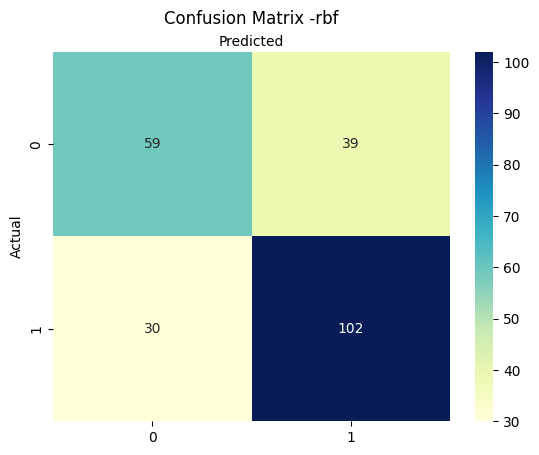

From the matrix:
The model correctly classified a total of 59 (True Negatives) + 102 (True Positives) = 161 instances.
It misclassified a total of 39 (False Positives) + 30 (False Negatives) = 69 instances.
Cross-Validation Scores: [0.50434783 0.35217391 0.34497817 0.36681223]
Kernel: sigmoid
Accuracy: 0.45652173913043476
Precision: 0.5244755244755245
Recall: 0.5681818181818182


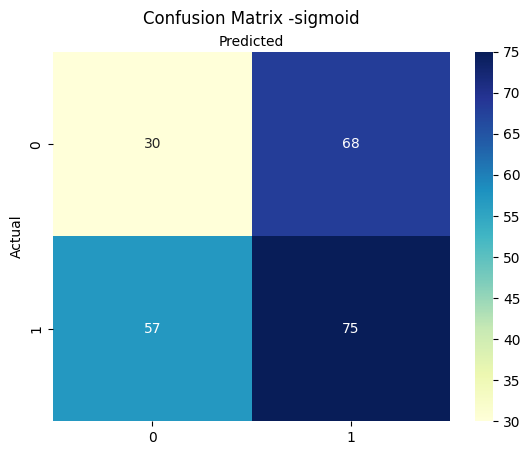

From the matrix:
The model correctly classified a total of 30 (True Negatives) + 75 (True Positives) = 105 instances.
It misclassified a total of 68 (False Positives) + 57 (False Negatives) = 125 instances.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
#librares for SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt
import seaborn as sns

#SVM
kernels = ['linear','poly', 'rbf', 'sigmoid']
for kernel in kernels:
  svm_model = SVC(kernel=kernel, random_state = 42)
  # Performing cross-validation with K=4
  cv_scores = cross_val_score(svm_model, SelectedFeatures, TargetFeature, cv=4)
  print("Cross-Validation Scores:", cv_scores)

  svm_model.fit(X_train, y_train)
  y_pred = svm_model.predict(X_test)

  #calculating accuracy, precision, and recall
  kaccuracy = accuracy_score(y_test, y_pred)
  kprecision = precision_score(y_test, y_pred)
  krecall = recall_score(y_test, y_pred)
  print(f"Kernel: {kernel}")
  print(f"Accuracy: {kaccuracy}")
  print(f"Precision: {kprecision}")
  print(f"Recall: {krecall}")

  #confusion matrix
  svm_conf_matrix = confusion_matrix(y_test, y_pred)

  # Defining labels and plotting heatmap
  labels = [0,1]
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Plotting heatmap
  sns.heatmap(pd.DataFrame(svm_conf_matrix), annot=True, cmap="YlGnBu", fmt='g', cbar=True, ax=ax)
  ax.xaxis.set_label_position("top")
  plt.title(f'Confusion Matrix -{kernel}', pad=20)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  tn, fp, fn, tp = svm_conf_matrix.ravel()
  total_correct = tn + tp
  total_misclassified = fp + fn
  print(f"From the matrix:")
  print(f"The model correctly classified a total of {tn} (True Negatives) + {tp} (True Positives) = {total_correct} instances.")
  print(f"It misclassified a total of {fp} (False Positives) + {fn} (False Negatives) = {total_misclassified} instances.")